In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rifatulmajumder23/combined-unknown-pneumonia-and-tuberculosis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/combined-unknown-pneumonia-and-tuberculosis


In [54]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import DenseNet121, ResNet50
sns.set()

In [3]:
images, labels = [], []

In [4]:
for i in os.listdir('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/train'):
    for j in os.listdir(os.path.join('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/train', i)):
        path = os.path.join('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/train', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [5]:
df_label = pd.DataFrame({
    'label' : labels
})

In [6]:
df_label.head()

,label
0,UNKNOWN
1,UNKNOWN
2,UNKNOWN
3,UNKNOWN
4,UNKNOWN


In [7]:
print('Number of images in the dataset is:', len(images))
print('Number of labels in the dataset is:', df_label['label'].nunique())
print('The labels in the dataset are:', df_label['label'].unique())

Number of images in the dataset is: 13028
Number of labels in the dataset is: 4
The labels in the dataset are: ['UNKNOWN' 'PNEUMONIA' 'TUBERCULOSIS' 'NORMAL']


In [8]:
images_s, labels_s = shuffle(images, labels)

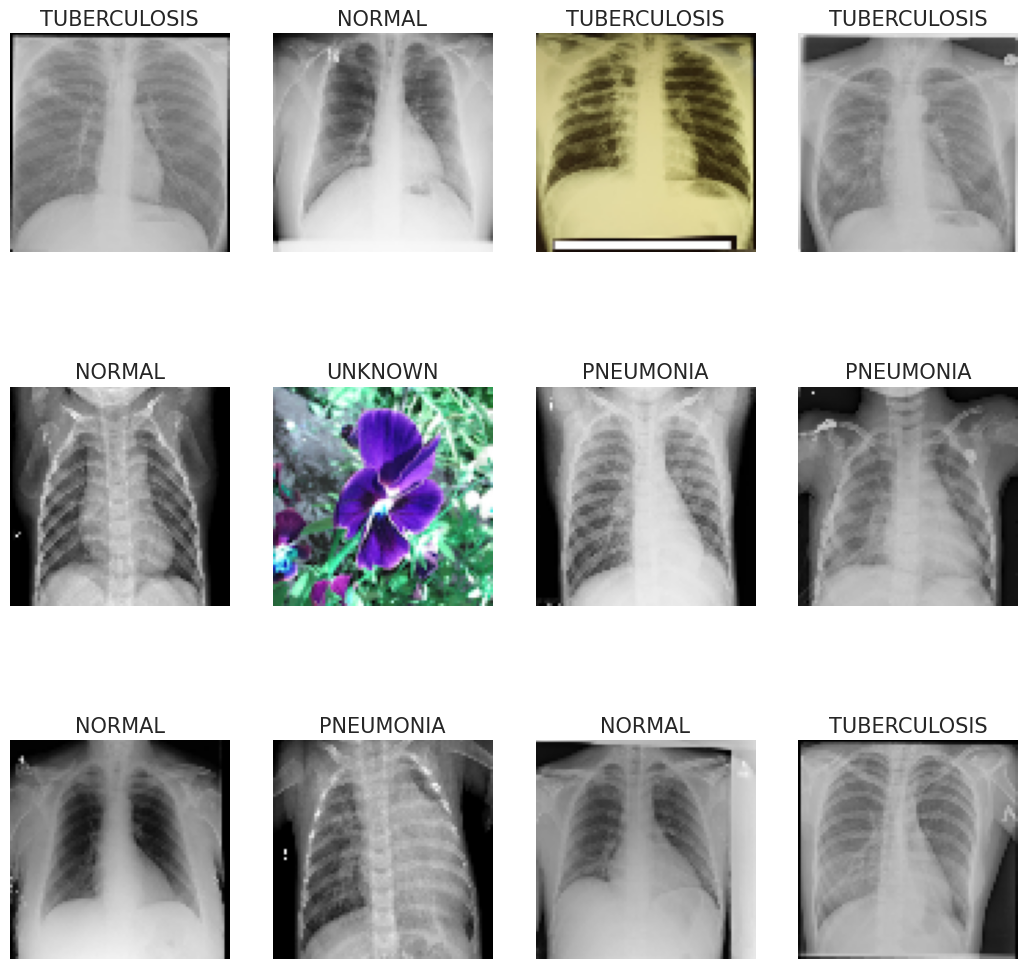

In [9]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images_s[i])
    plt.title(labels_s[i], fontsize = 15)
    plt.axis('off')

In [10]:
le = LabelEncoder()

In [11]:
y = le.fit_transform(labels_s)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images_s, y, test_size = 0.2, random_state = 101, shuffle = True, 
                                                   stratify = y)

In [13]:
print('The size of training dataset is:', len(X_train))
print('The size of test dataset is:', len(X_test))

The size of training dataset is: 10422
The size of test dataset is: 2606


In [14]:
X_train = np.array(X_train)

In [15]:
X_test = np.array(X_test)

In [16]:
X_train_scaled = X_train / 255

In [17]:
X_test_scaled = X_test / 255

In [18]:
val_images, val_labels = [], []

In [19]:
for i in os.listdir('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/val'):
    for j in os.listdir(os.path.join('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/val', i)):
        path_n = os.path.join('/kaggle/input/combined-unknown-pneumonia-and-tuberculosis/data/val', i, j)
        img_n = cv2.imread(path_n)
        if img_n is None:
            print('Wrong path')
        else:
            resized_img_n = cv2.resize(img_n, (80, 80))
            val_images.append(resized_img_n)
            val_labels.append(i)

In [20]:
print('The size of validation dataset is:', len(val_images))

The size of validation dataset is: 761


In [21]:
val_im, val_lbl = shuffle(val_images, val_labels)

In [22]:
val_im = np.array(val_im)

In [23]:
val_im_scaled = val_im / 255

In [24]:
val_l = le.fit_transform(val_lbl)

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

In [29]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_data = (val_im_scaled, val_l), callbacks = [early_stopping])

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7608 - loss: 0.5827 - val_accuracy: 0.8804 - val_loss: 0.3503
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9029 - loss: 0.2477 - val_accuracy: 0.9225 - val_loss: 0.1980
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9281 - loss: 0.1870 - val_accuracy: 0.9422 - val_loss: 0.1627
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9389 - loss: 0.1632 - val_accuracy: 0.9488 - val_loss: 0.1377
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9495 - loss: 0.1398 - val_accuracy: 0.9566 - val_loss: 0.1125
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9521 - loss: 0.1217 - val_accuracy: 0.9606 - val_loss: 0.1184
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9634 - loss: 0.0986 - val_accuracy: 0.9474 - val_loss: 0.1277
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9646 - loss: 0.0868 - val_ac

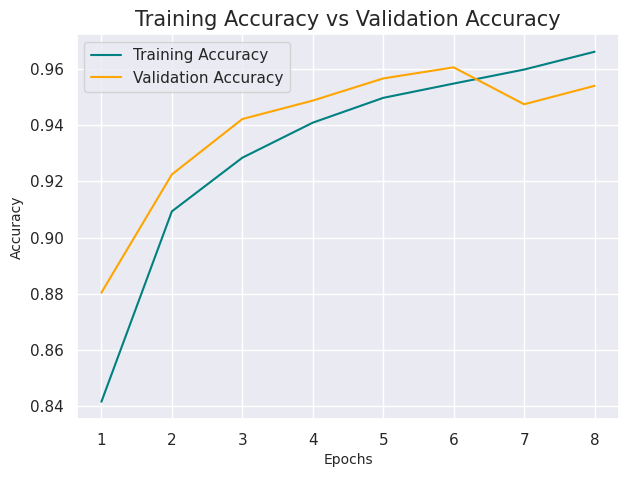

In [32]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = [1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.show()

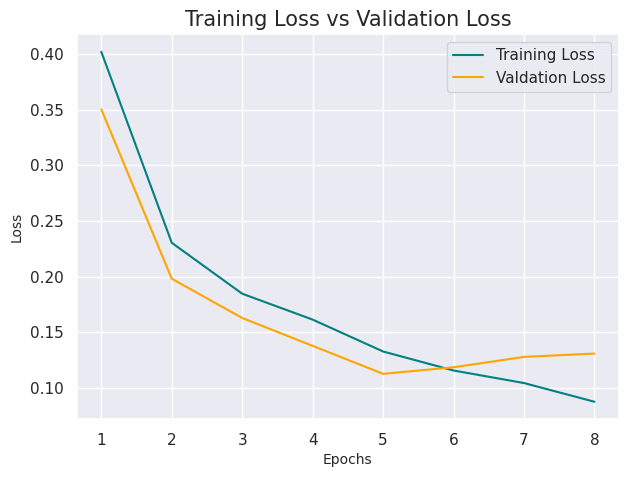

In [33]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Valdation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = [1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.show()

In [34]:
y_pred = model.predict(X_test_scaled)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [35]:
model.evaluate(X_test_scaled, y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9550 - loss: 0.1293


[0.13772454857826233, 0.9543361663818359]

In [36]:
y_predict = [np.argmax(i) for i in y_pred]

In [37]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       933
           1       0.97      0.97      0.97       727
           2       0.95      0.95      0.95       715
           3       0.98      1.00      0.99       231

    accuracy                           0.95      2606
   macro avg       0.96      0.96      0.96      2606
weighted avg       0.95      0.95      0.95      2606



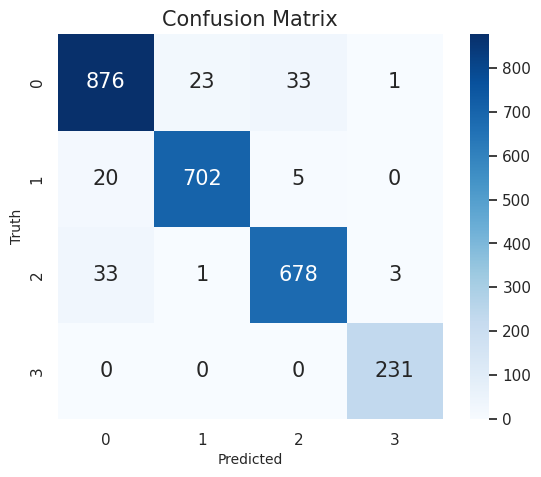

In [38]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [39]:
base_model1 = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
model2 = Sequential()

In [41]:
model2.add(base_model1)
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(4, activation = 'softmax'))

In [42]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [43]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 3)

In [44]:
history2 = model2.fit(X_train_scaled, y_train, epochs = 100, validation_data = (val_im_scaled, val_l), 
                      callbacks = [early_stopping2])

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 307ms/step - accuracy: 0.8208 - loss: 0.6711 - val_accuracy: 0.8528 - val_loss: 0.4317
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8668 - loss: 0.5770 - val_accuracy: 0.3364 - val_loss: 2811.7595
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8748 - loss: 0.9048 - val_accuracy: 0.8804 - val_loss: 0.3051
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8992 - loss: 0.5257 - val_accuracy: 0.1275 - val_loss: 9.4290
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9089 - loss: 0.2588 - val_accuracy: 0.9540 - val_loss: 0.1218
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9366 - loss: 0.1590 - val_accuracy: 0.9369 - val_loss: 0.1415
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9546 - loss: 0.1150 - val_accuracy: 0.9448 - val_loss: 0.1336
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9619 - lo

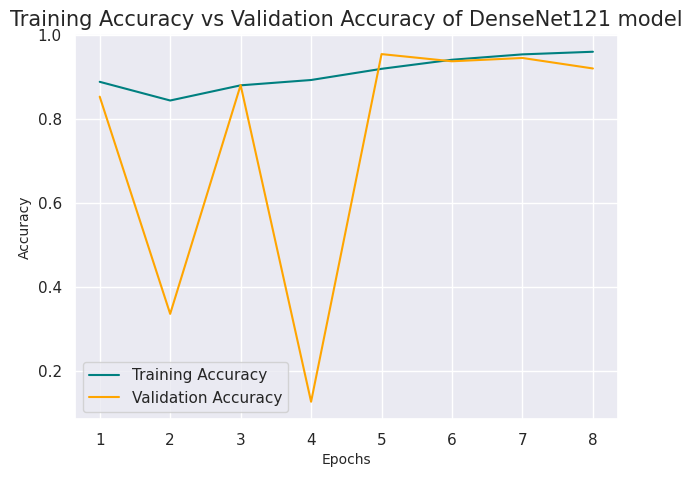

In [47]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = [1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.show()

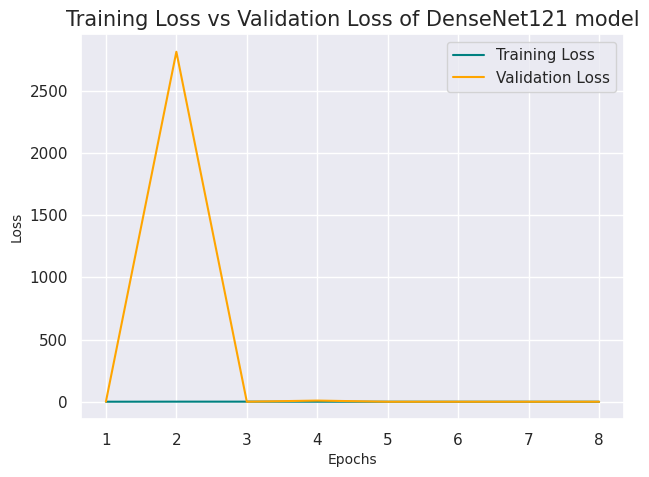

In [48]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels = [1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.show()

In [49]:
model2.evaluate(X_test_scaled, y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9109 - loss: 0.2382


[0.2216348797082901, 0.9194167256355286]

In [50]:
y_pred2 = model2.predict(X_test_scaled)

82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step


In [51]:
y_predict2 = [np.argmax(i) for i in y_pred2]

In [52]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       933
           1       0.99      0.83      0.90       727
           2       0.91      0.95      0.93       715
           3       1.00      0.99      1.00       231

    accuracy                           0.92      2606
   macro avg       0.94      0.93      0.93      2606
weighted avg       0.92      0.92      0.92      2606



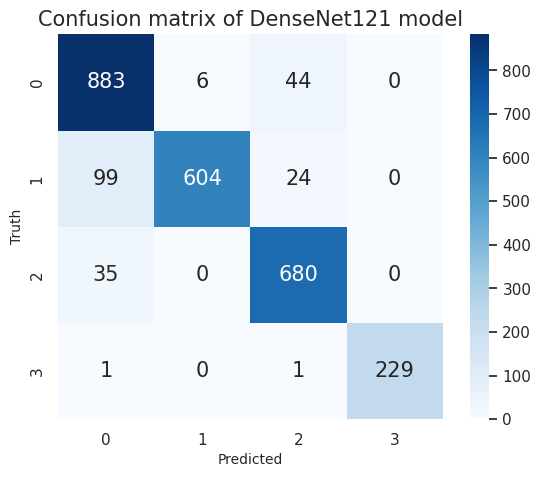

In [53]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_predict2), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of DenseNet121 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [55]:
base_model2 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [77]:
model3 = Sequential()

In [78]:
model3.add(base_model2)
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(4, activation = 'softmax'))

In [79]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [80]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 5)

In [81]:
history3 = model3.fit(X_train_scaled, y_train, epochs = 100, validation_data = (val_im_scaled, val_l), 
                      callbacks = [early_stopping3])

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 91s 136ms/step - accuracy: 0.9311 - loss: 0.1853 - val_accuracy: 0.7963 - val_loss: 0.8069
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9643 - loss: 0.0984 - val_accuracy: 0.4980 - val_loss: 4.0630
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.9640 - loss: 0.1112 - val_accuracy: 0.6649 - val_loss: 2.1378
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9795 - loss: 0.0562 - val_accuracy: 0.6781 - val_loss: 3.9166
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9743 - loss: 0.0769 - val_accuracy: 0.4258 - val_loss: 46.3808
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8674 - loss: 0.8849 - val_accuracy: 0.9251 - val_loss: 0.7588
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9114 - loss: 0.4670 - val_accuracy: 0.9264 - val_loss: 0.1908
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9297 - loss:

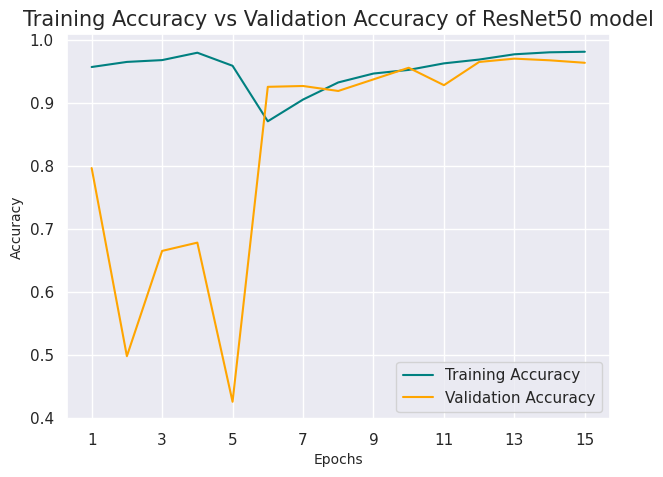

In [83]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.xticks(ticks = [0, 2, 4, 6, 8, 10, 12, 14], labels = [1, 3, 5, 7, 9, 11, 13, 15])
plt.legend()
plt.show()

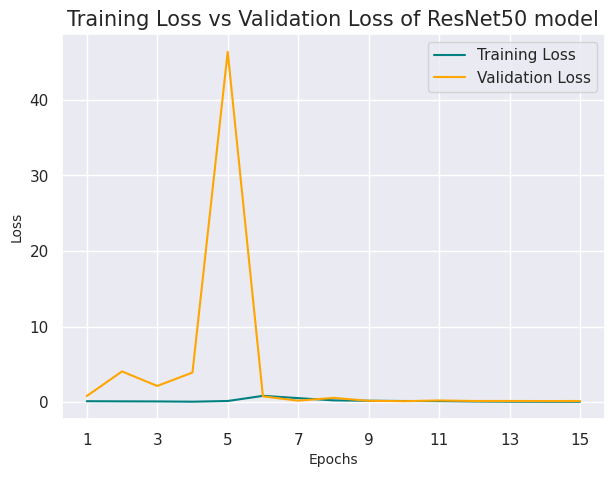

In [84]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], [1, 3, 5, 7, 9, 11, 13, 15])
plt.legend()
plt.show()

In [86]:
model3.evaluate(X_test_scaled, y_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9546 - loss: 0.1778


[0.1830197274684906, 0.9524174928665161]

In [87]:
y_pred3 = model3.predict(X_test_scaled)

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step


In [88]:
y_predict3 = [np.argmax(i) for i in y_pred3]

In [89]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       933
           1       0.98      0.96      0.97       727
           2       0.96      0.93      0.94       715
           3       0.98      1.00      0.99       231

    accuracy                           0.95      2606
   macro avg       0.96      0.96      0.96      2606
weighted avg       0.95      0.95      0.95      2606



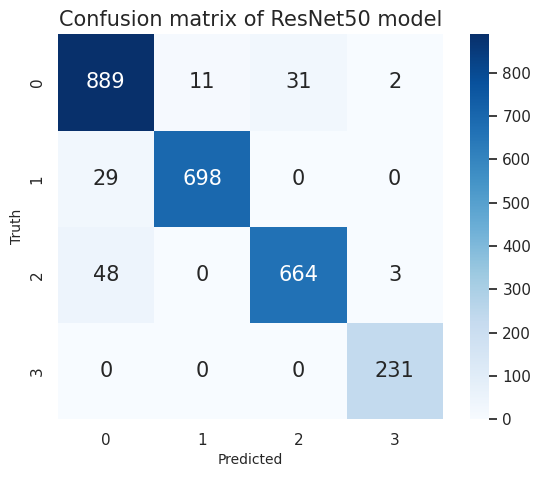

In [90]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_predict3), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of ResNet50 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()